In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from data_analysis.DataProcessor import DataProcessor

warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming preprocessor and DataProcessor have been correctly defined and imported

# Read in combined stock data
preprocessor = DataProcessor()
# Create df to current date
df = preprocessor.process_nrw_data("06_27")

# Ensure timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])


File already exists: C:\Users\FelixNeubauer\UniRepos\webscraper\data_analysis\processed_nrw_data\06_27_nrw_stock_data.csv. Loading DataFrame from file.


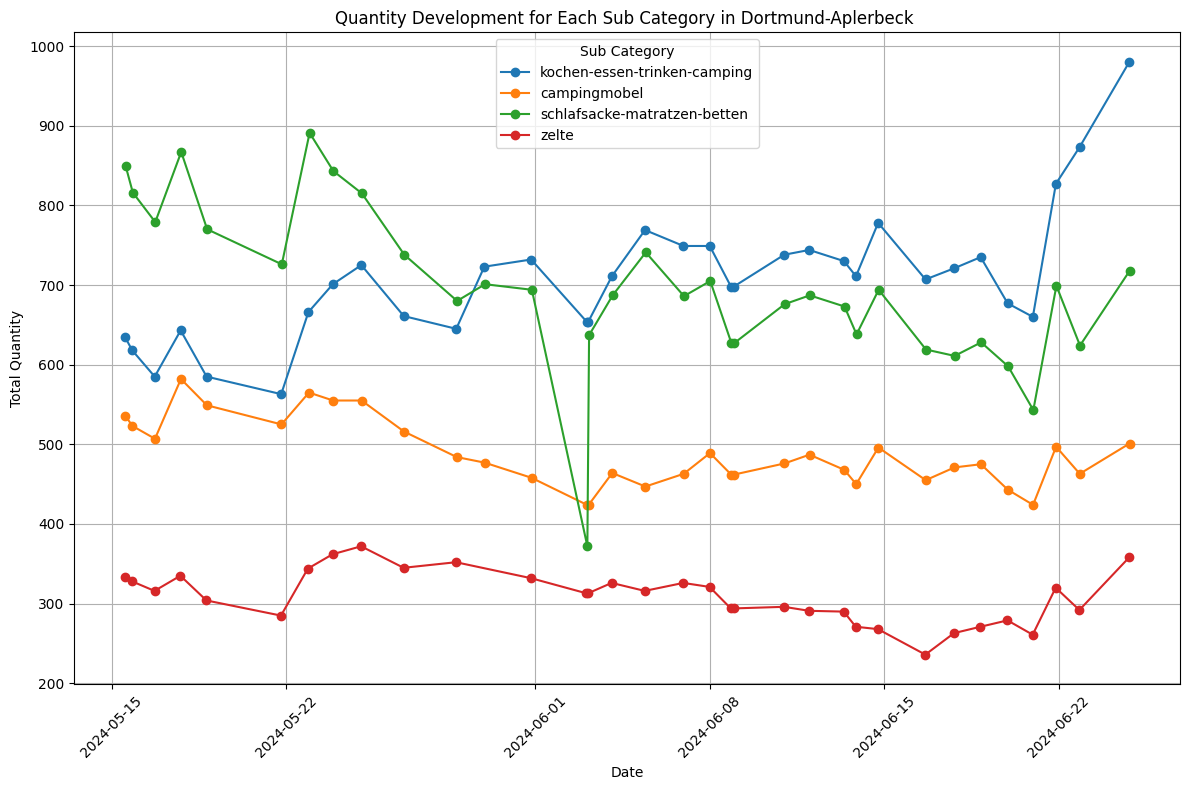

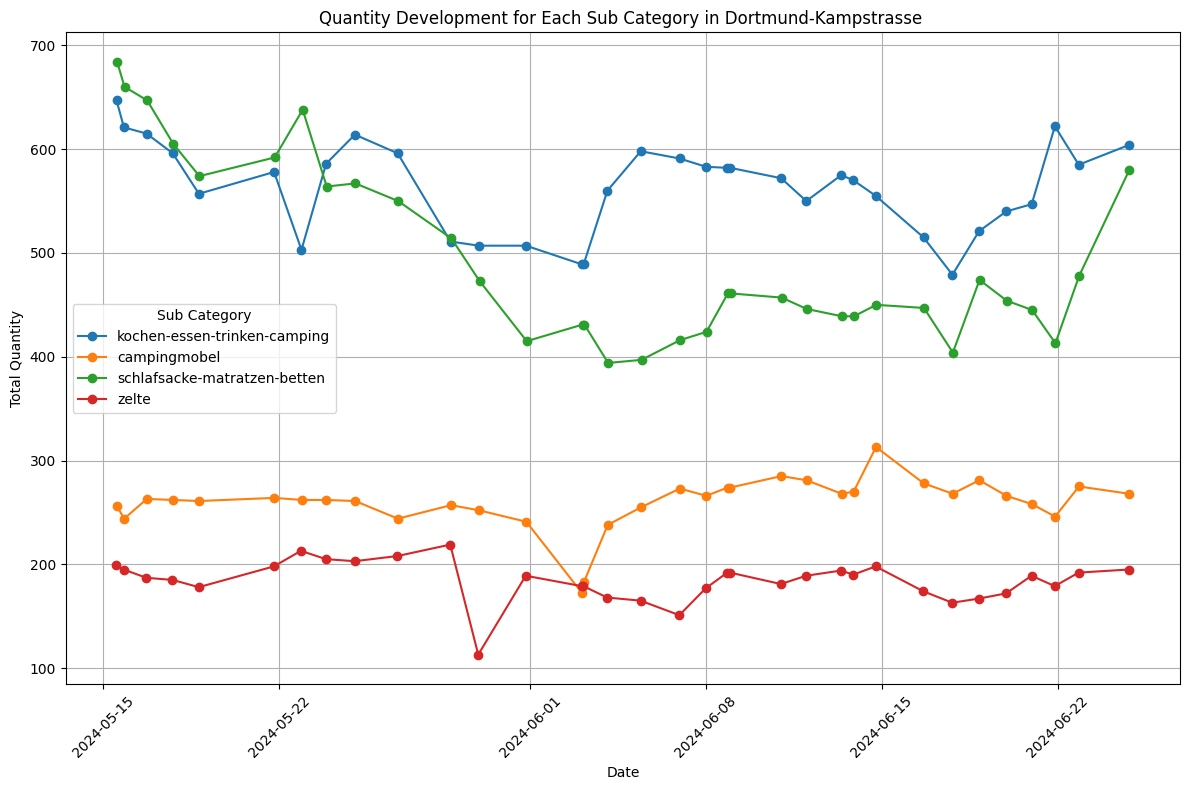

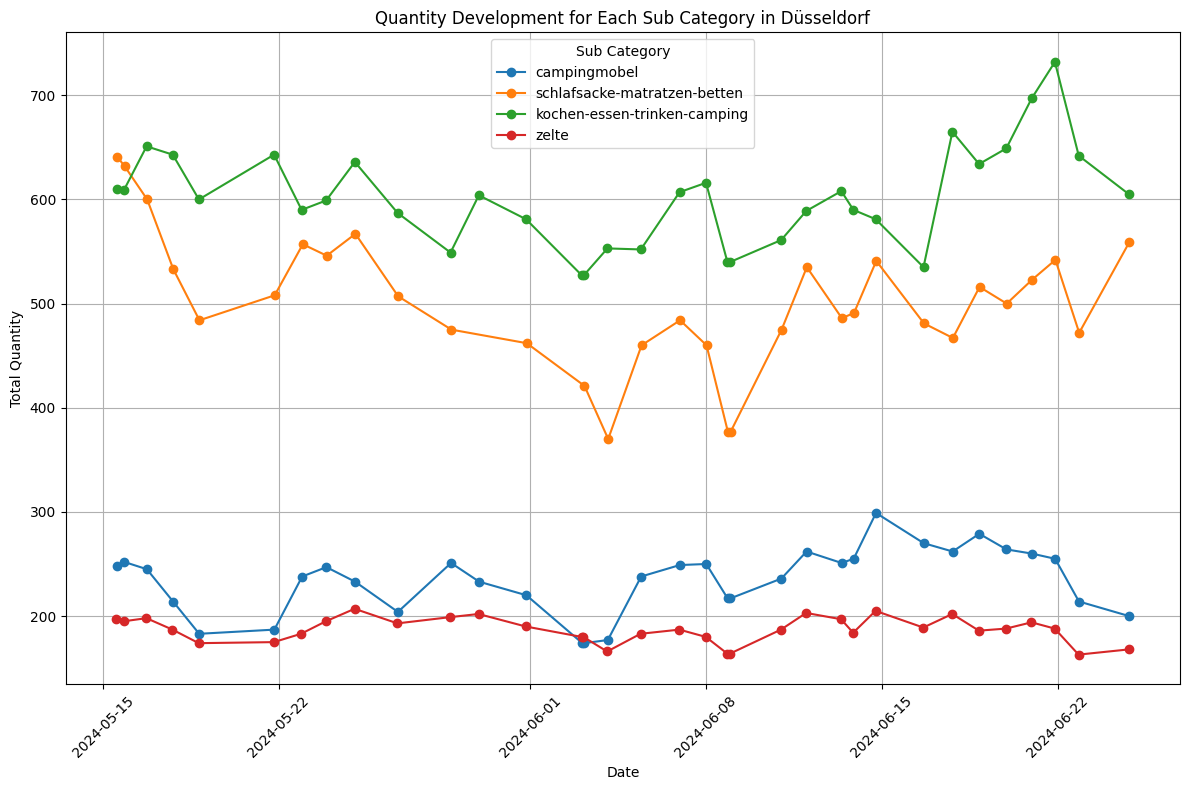

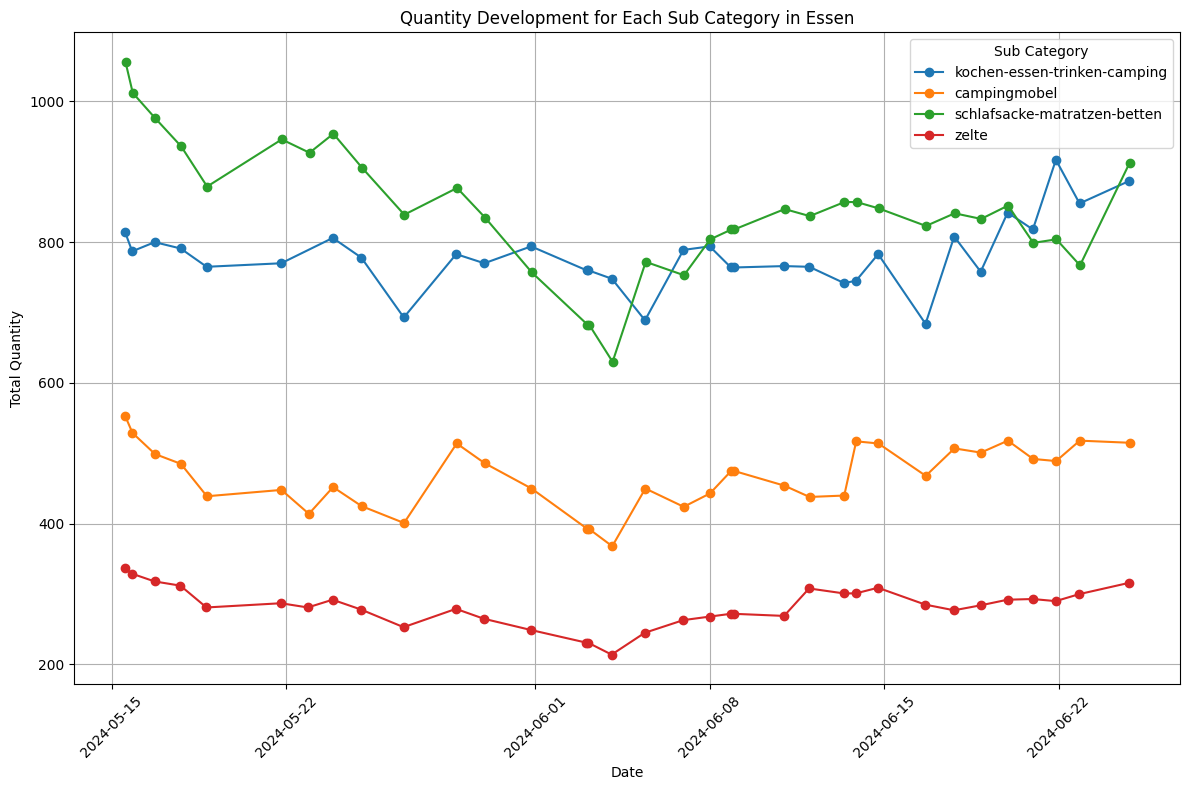

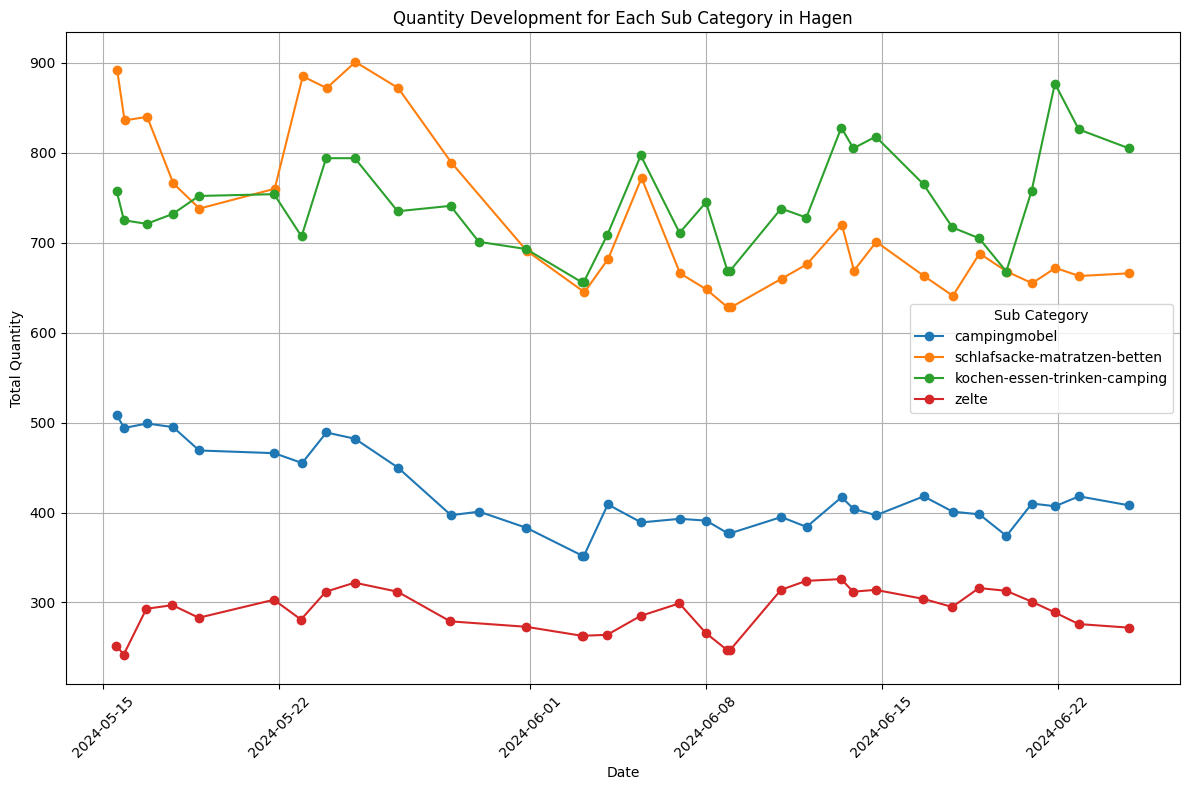

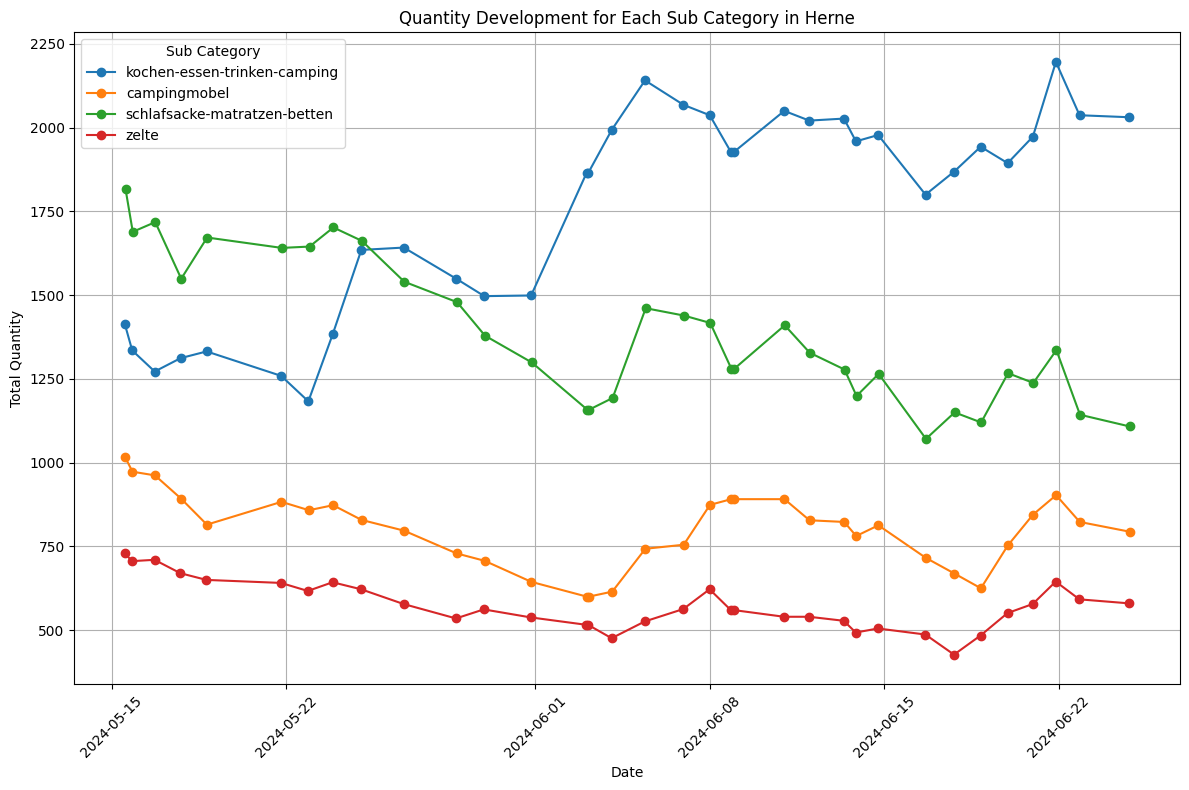

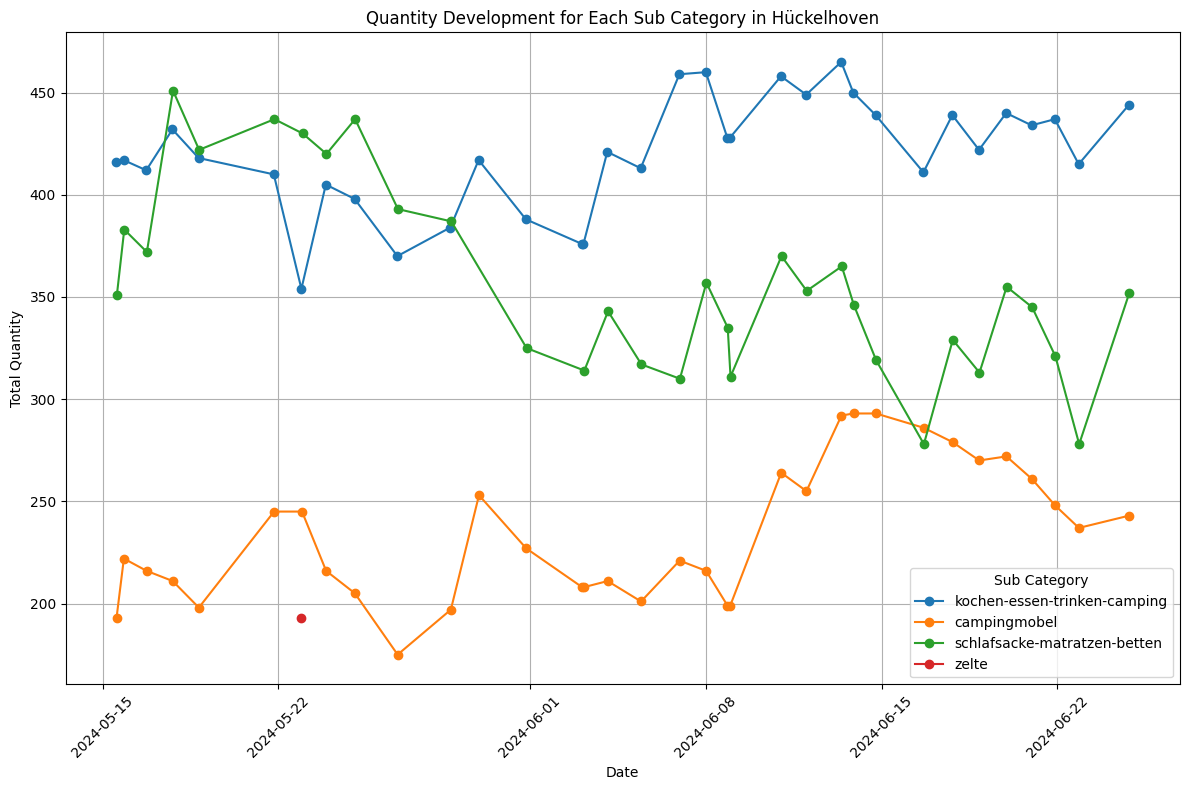

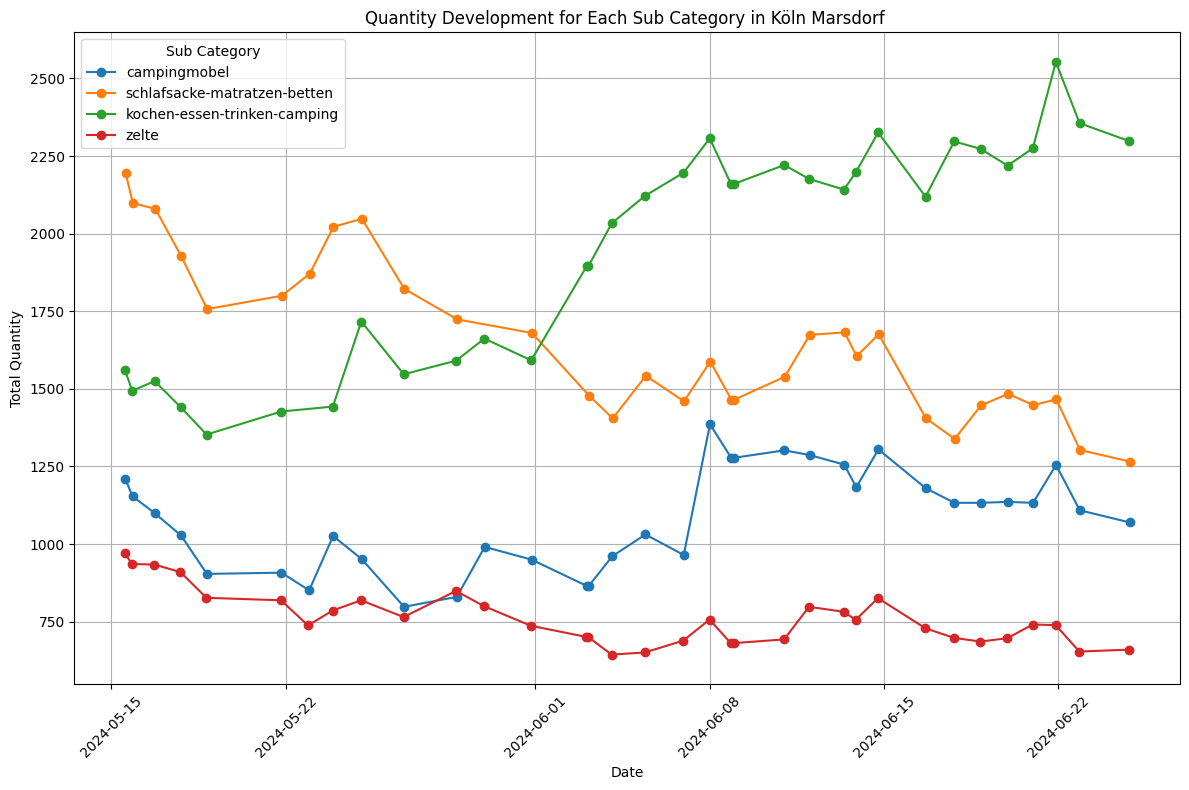

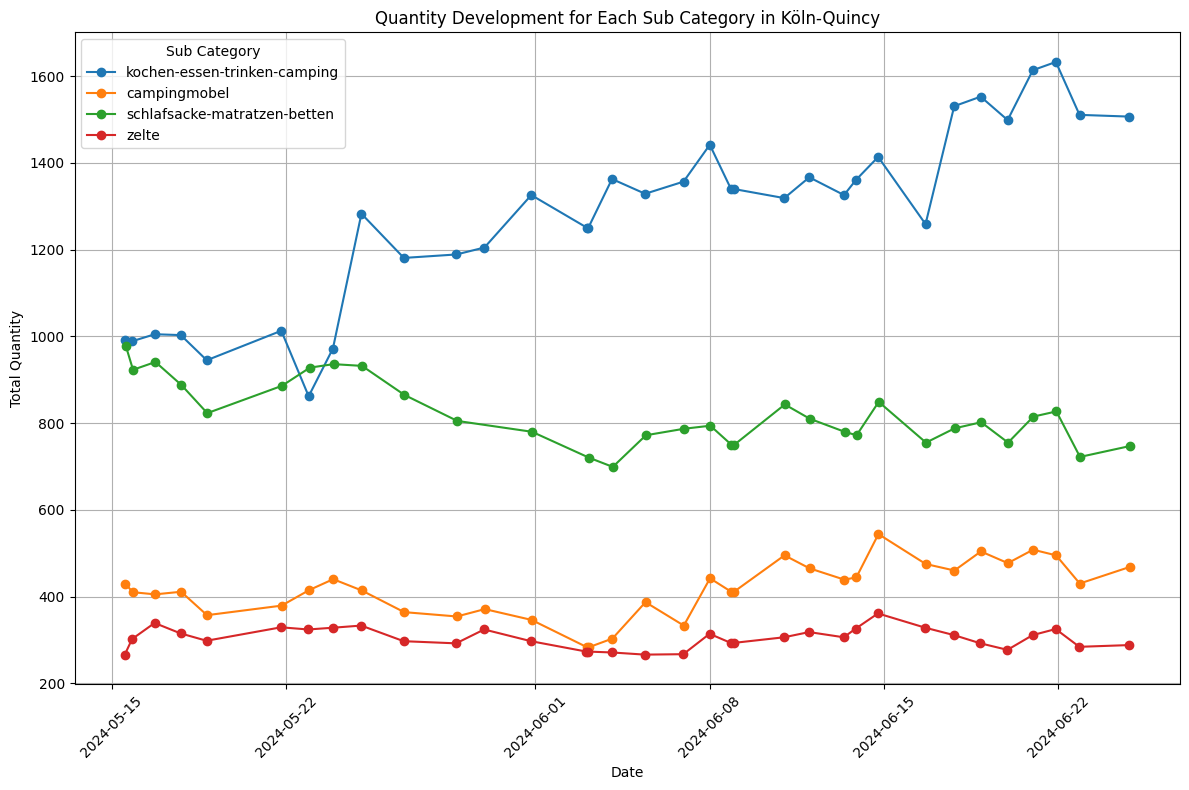

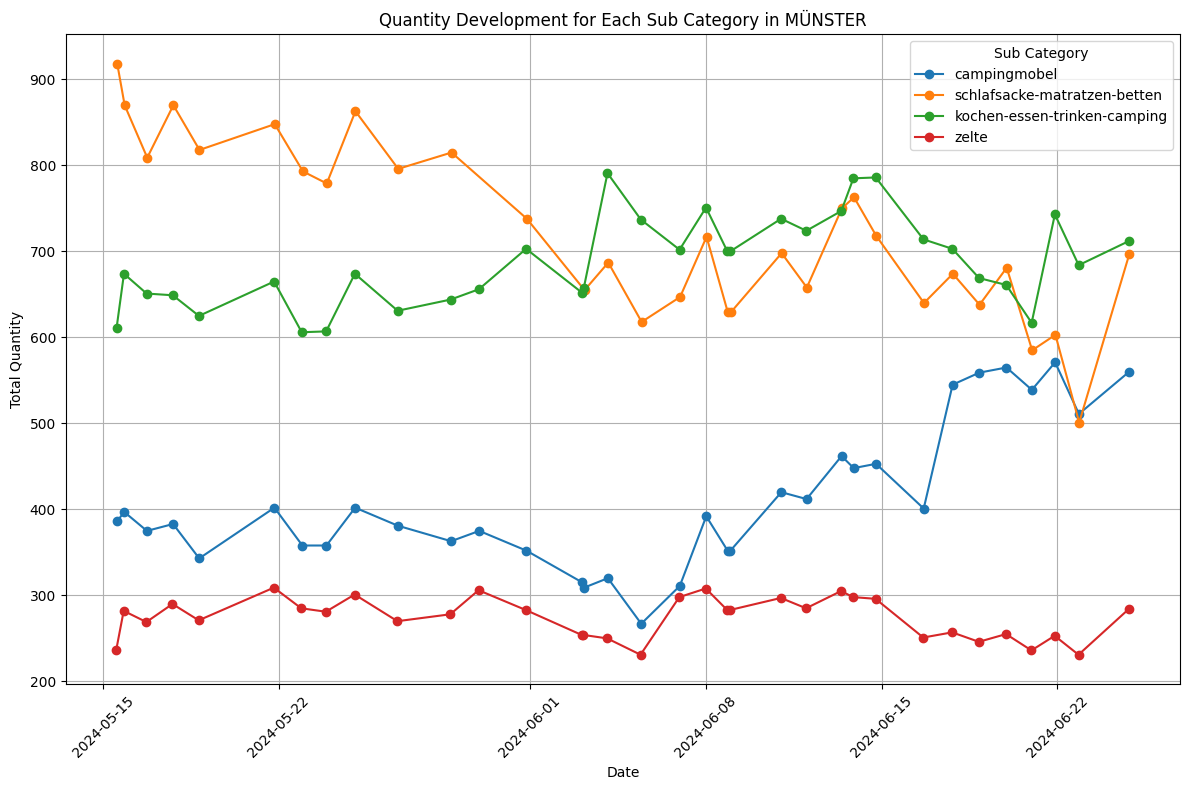

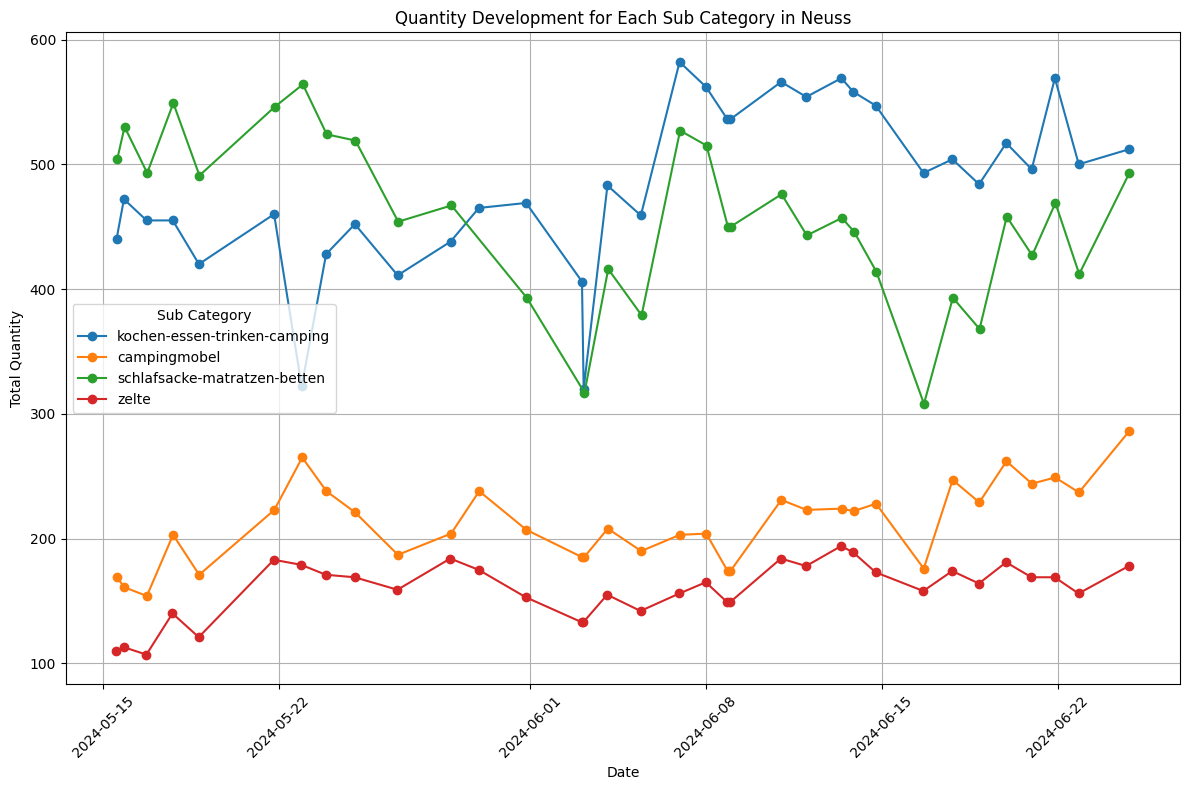

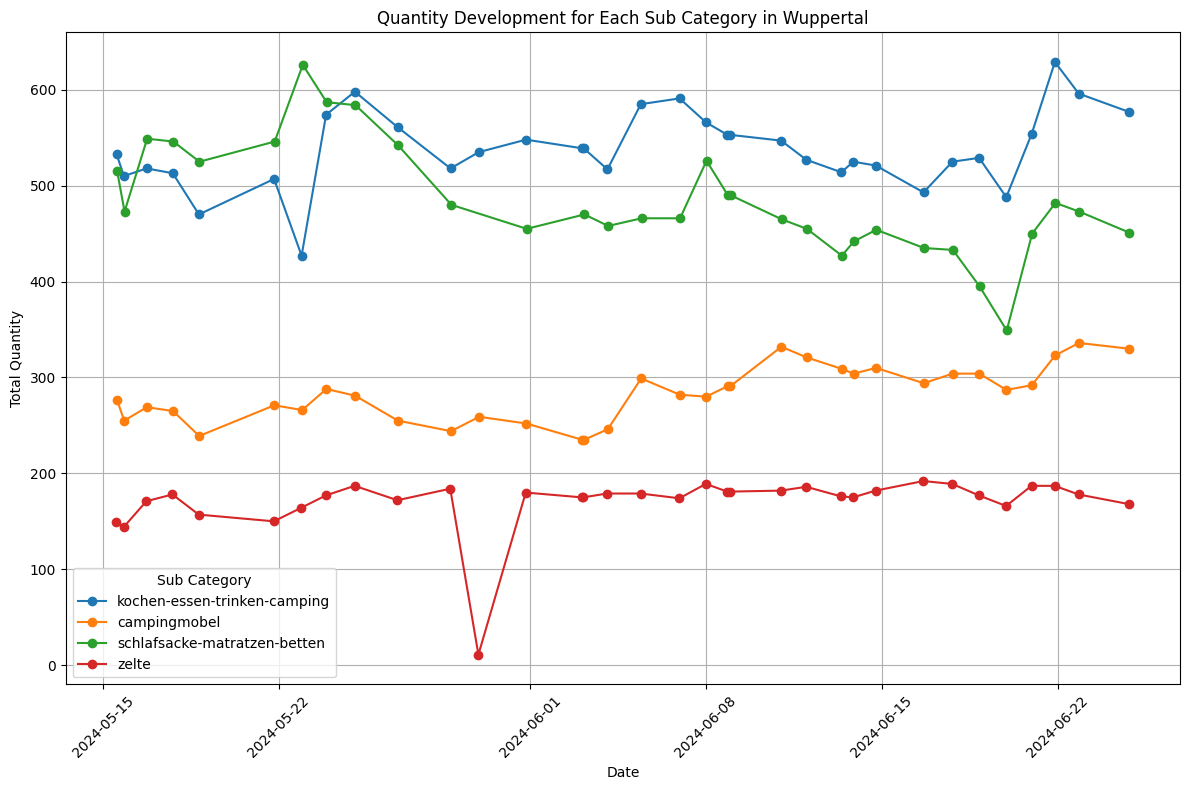

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already read and timestamp is in datetime format

# Step 1: Filter relevant main_category and sub_category
camping_df = df[df['main_category'] == 'camping']

# Step 2: Get unique store names
store_names = camping_df['store_storeName'].unique()

# Define the period for filtering
start_date = '2024-05-15'
end_date = '2024-06-25'

# Step 3 to Step 7 are repeated for each store
for store_name in store_names:
    # Filter data to focus on the specific store
    store_df = camping_df[camping_df['store_storeName'] == store_name]

    # Sort data by id, store_skuId, and timestamp
    store_df = store_df.sort_values(by=['id', 'store_skuId', 'timestamp'])

    # Calculate quantity differences for each product variant
    store_df['quantity_diff'] = store_df.groupby(['id', 'store_skuId'])['store_quantity'].diff().fillna(0)

    # Identify decreases in quantity (potential sales)
    store_df['sales'] = store_df['quantity_diff'].apply(lambda x: -x if x < 0 else 0)

    # Filter the data to focus on the specified period
    period_df = store_df[(store_df['timestamp'] >= start_date) & (store_df['timestamp'] <= end_date)]

    # Combine the plots in one plot with one line for each sub_category
    plt.figure(figsize=(12, 8))

    sub_categories = period_df['sub_category'].unique()

    for sub_category in sub_categories:
        sub_category_df = period_df[period_df['sub_category'] == sub_category]
        sub_category_df = sub_category_df.groupby('timestamp')['store_quantity'].sum().reset_index()
        plt.plot(sub_category_df['timestamp'], sub_category_df['store_quantity'], marker='o', linestyle='-', label=sub_category)

    plt.title(f'Quantity Development for Each Sub Category in {store_name}')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45)
    plt.legend(title='Sub Category')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
